Deliverables

Descriptive Statistics Report



Summary statistics for numerical features, including mean, median, standard deviation, minimum, and maximum values.

Frequency distribution and mode for categorical features.

Insights into the central tendency, dispersion, and distribution of the data.

Visual Analysis Report



Histograms: Visual representation of the distribution of numerical features to identify patterns or skewness.

Pair Plots: Visualization of relationships between pairs of numerical features to identify correlations or trends.

Heatmaps: Correlation matrix heatmap to identify relationships between features and their potential relevance to the target variable.



Insights and Recommendations



Highlight significant findings from the statistical and visual analysis, such as highly correlated features or features with significant variability.

Provide actionable recommendations for data preprocessing, such as handling missing values, normalizing features, or balancing the dataset.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df=pd.read_csv("dataset_phishing.csv")
df.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [7]:
print("\nChecking missing values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Checking missing values:
Series([], dtype: int64)


In [9]:
df.duplicated().sum()

0

In [11]:
numerical_stats=df.describe()

In [13]:
categorical_stats=df["status"].value_counts()

In [15]:
print("Numerical Descriptive Statistics:\n",numerical_stats)
print("Categorical Frequency Distribution:\n",categorical_stats)

Numerical Descriptive Statistics:
          length_url  length_hostname            ip       nb_dots  \
count  11430.000000     11430.000000  11430.000000  11430.000000   
mean      61.126684        21.090289      0.150569      2.480752   
std       55.297318        10.777171      0.357644      1.369686   
min       12.000000         4.000000      0.000000      1.000000   
25%       33.000000        15.000000      0.000000      2.000000   
50%       47.000000        19.000000      0.000000      2.000000   
75%       71.000000        24.000000      0.000000      3.000000   
max     1641.000000       214.000000      1.000000     24.000000   

         nb_hyphens         nb_at         nb_qm        nb_and    nb_or  \
count  11430.000000  11430.000000  11430.000000  11430.000000  11430.0   
mean       0.997550      0.022222      0.141207      0.162292      0.0   
std        2.087087      0.155500      0.364456      0.821337      0.0   
min        0.000000      0.000000      0.000000      0.0

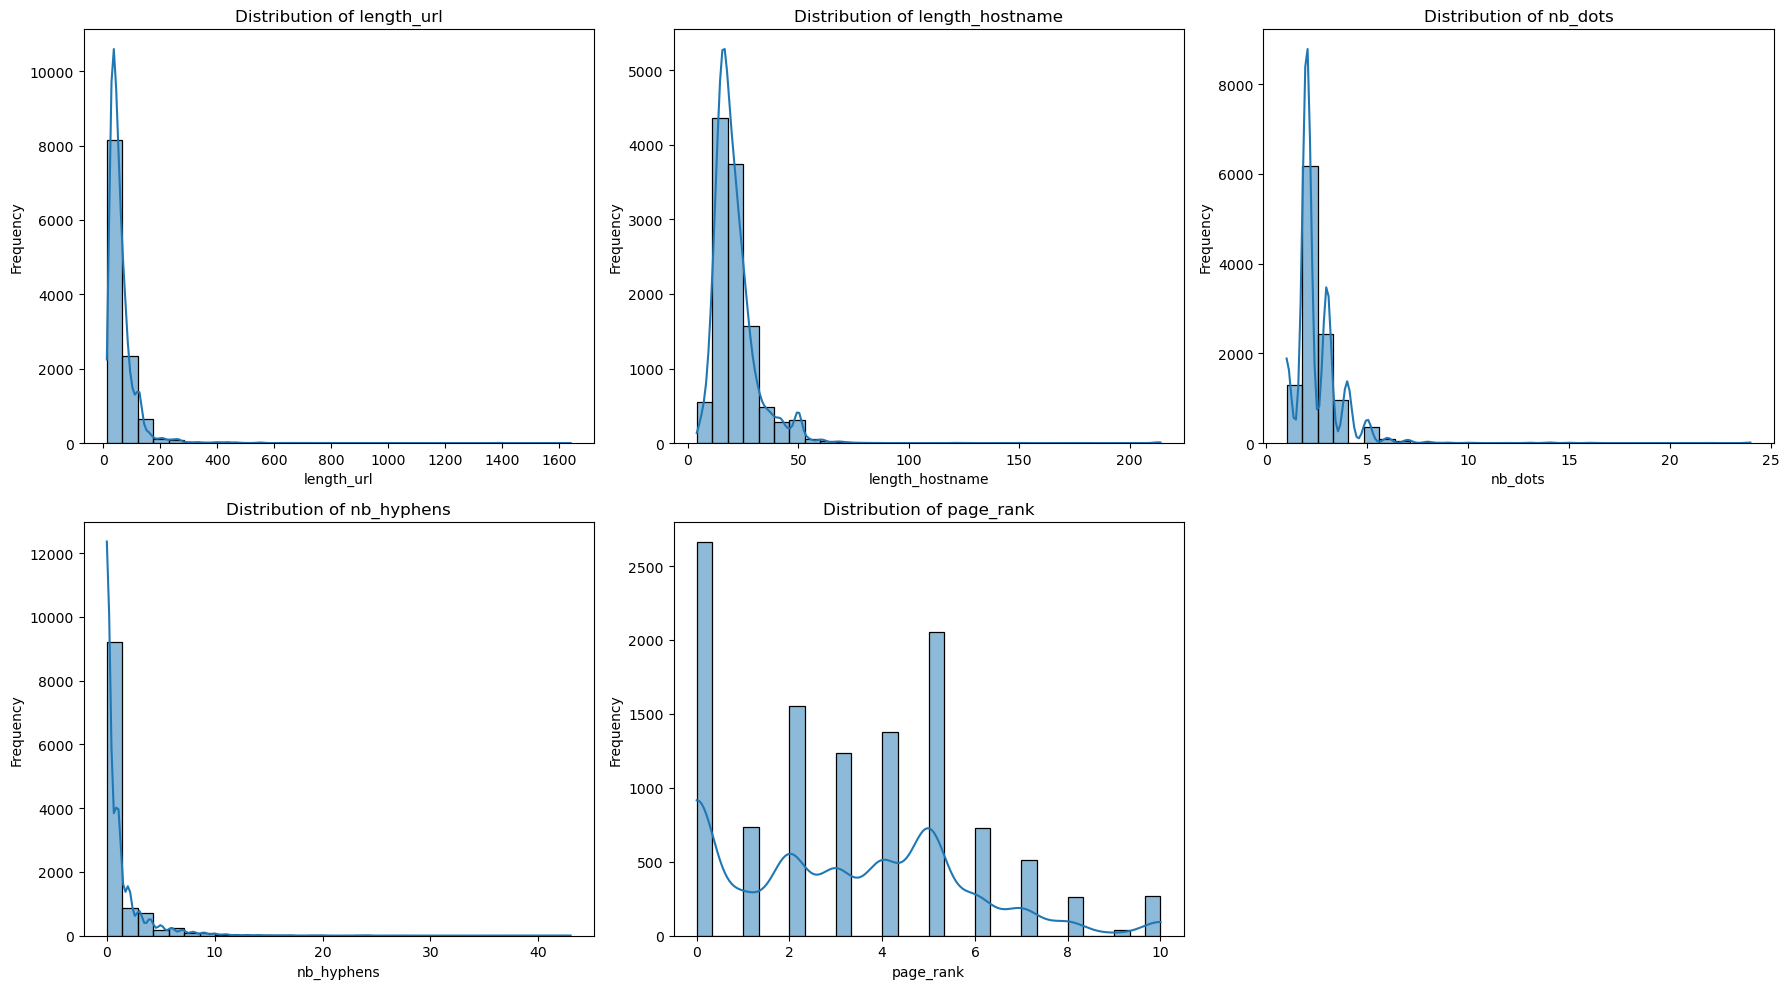

In [17]:
selected_features=["length_url","length_hostname","nb_dots","nb_hyphens","page_rank"]
fig,axes=plt.subplots(2,3,figsize=(18,10))
axes=axes.flatten()

for i,feature in enumerate(selected_features):
    sns.histplot(df[feature],bins=30,kde=True,ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")
for j in range(len(selected_features),len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [19]:
numerical_features=df.select_dtypes(include=["int64","float64"]).columns.tolist()
print(numerical_features)

['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS', 'ratio_intR

In [21]:
categorical_features=df.select_dtypes(include=["object"]).columns.tolist()
print(categorical_features)

['url', 'status']


In [23]:
# Function to replace outliers using the IQR method
def handle_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)  # First quartile
    Q3 = df[feature].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[feature].median()  # Median value of the feature
    
    # Replace outliers with the median
    df[feature] = df[feature].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

# Identify numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Apply the outlier handling function to all numerical features
for feature in numerical_features:
    handle_outliers_iqr(df, feature)

print("Outliers handled successfully.")


Outliers handled successfully.


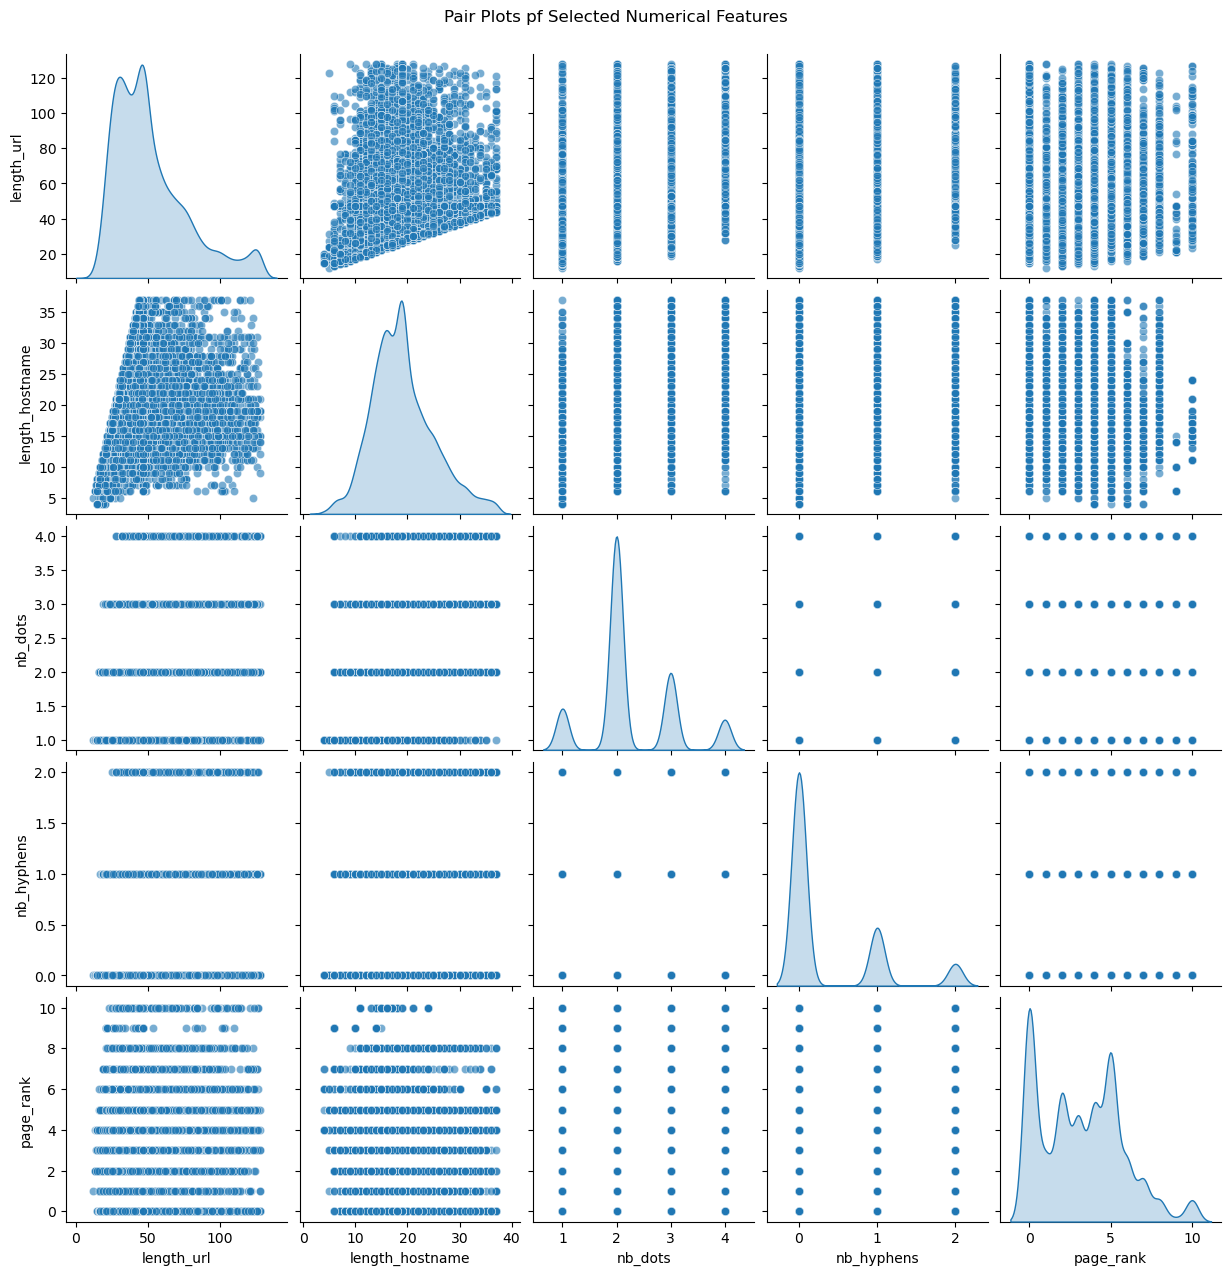

In [26]:
sns.pairplot(df[selected_features],diag_kind="kde",plot_kws={"alpha":0.6})
plt.suptitle("Pair Plots pf Selected Numerical Features",y=1.02)
plt.show()

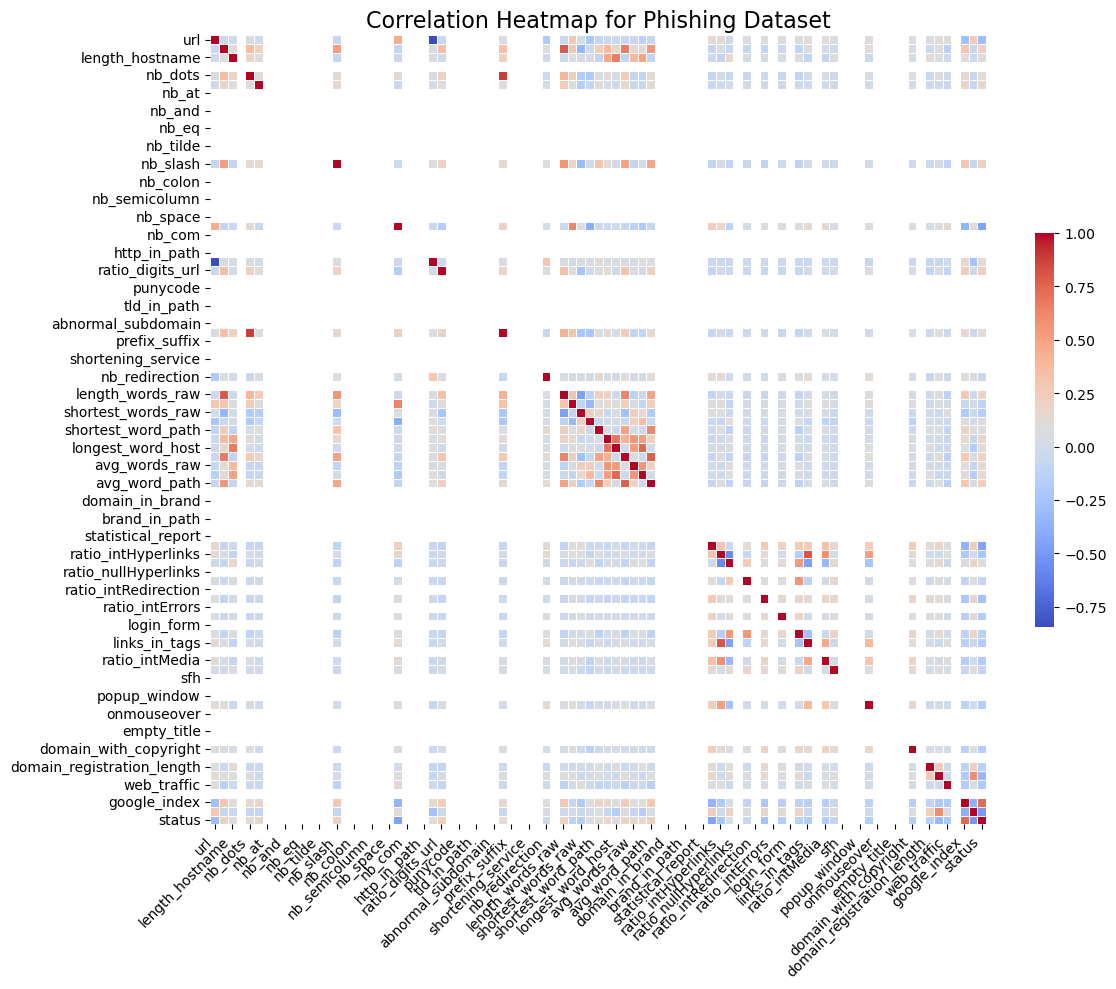

In [27]:

# Encode categorical features into numerical values
df_encoded = df.copy()
df_encoded = df_encoded.apply(lambda col: col.astype('category').cat.codes if col.dtypes == 'object' else col)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, 
    annot=False,          
    cmap="coolwarm",     
    linewidths=0.5,       
    cbar_kws={"shrink": 0.5} 
)
plt.title("Correlation Heatmap for Phishing Dataset", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10) 
plt.yticks(fontsize=10) 
plt.tight_layout()  
plt.show()


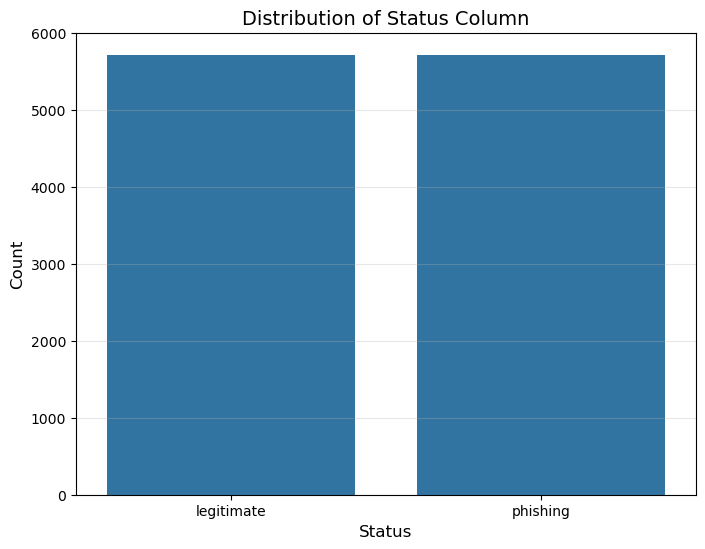

In [28]:
# Count plot for the 'status' column
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=df)
plt.title('Distribution of Status Column', fontsize=14)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()
